In [1]:
import numpy as np

In [3]:
import pandas as pd 

In [5]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [9]:
df = pd.read_csv('insurance.csv')

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1230,52,male,34.485,3,yes,northwest,60021.39897
279,51,female,21.560,1,no,southeast,9855.13140
790,39,female,41.800,0,no,southeast,5662.22500
892,54,male,24.035,0,no,northeast,10422.91665
939,53,male,29.480,0,no,southeast,9487.64420


In [15]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
df.shape()

TypeError: 'tuple' object is not callable

In [21]:
df.shape

(1338, 7)

In [23]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [25]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [27]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [29]:
list(df.sex.unique())

['female', 'male']

In [31]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
df[df.duplicated(keep='first')]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [35]:
df.drop_duplicates(keep='first',inplace=True)

C:\Users\ML\AppData\Local\Temp\ipykernel_10536\3599071152.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'],color='r')


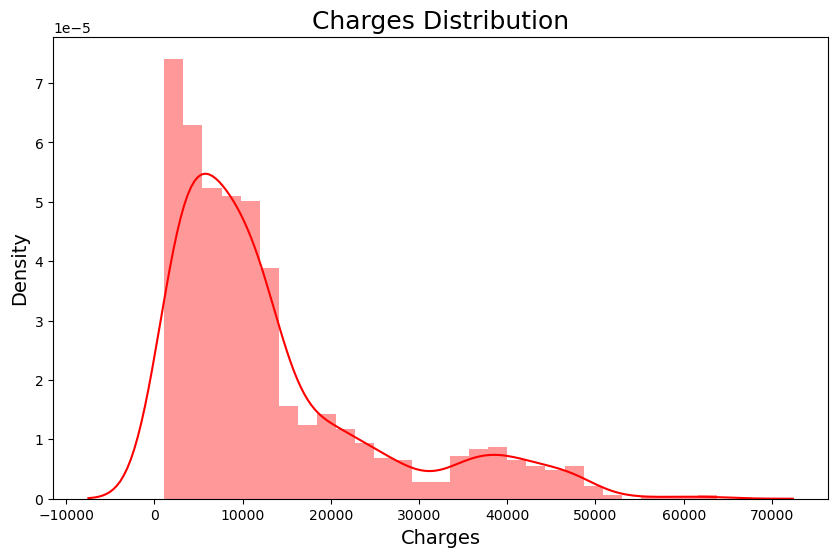

In [39]:
plt.figure(figsize=(10,6))
sns.distplot(df['charges'],color='r')
plt.title('Charges Distribution',size=18)
plt.xlabel('Charges',size=14)
plt.ylabel('Density',size=14)
plt.show()

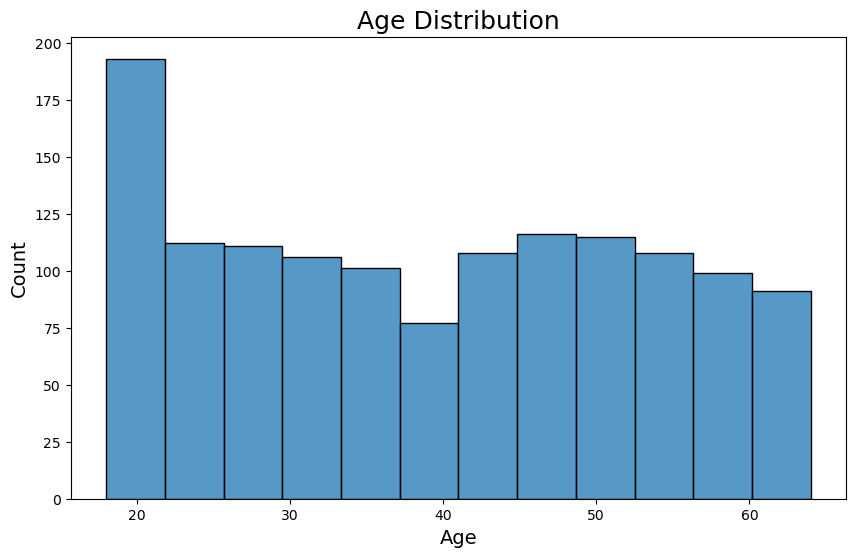

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(df.age)
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

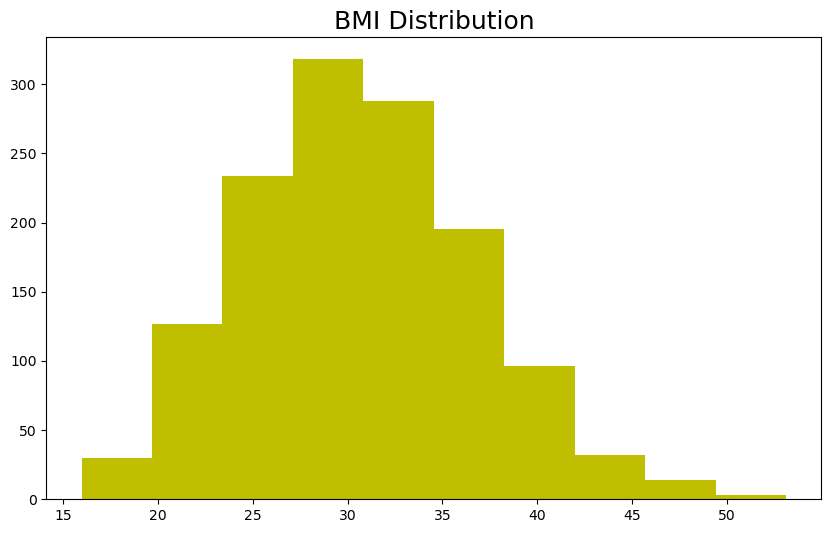

In [43]:
plt.figure(figsize=(10,6))
plt.hist(df.bmi,color='y')
plt.title('BMI Distribution',size=18)
plt.show()

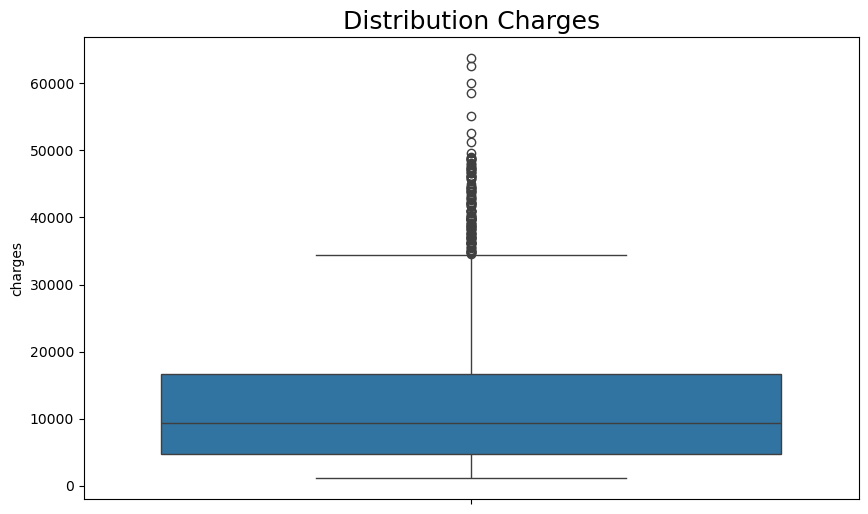

In [45]:
plt.figure(figsize = (10,6))
sns.boxplot(df.charges)
plt.title('Distribution Charges',size=18)
plt.show()

In [47]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

11911.37345


In [49]:
df[(df['charges']< Q1-1.5* IQR) | (df['charges']> Q3+1.5* IQR)]


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


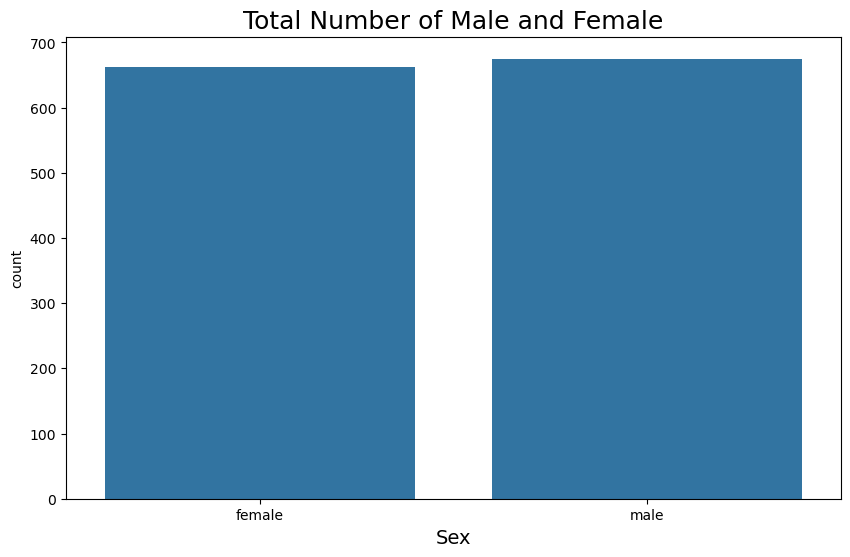

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'sex', data = df)
plt.title('Total Number of Male and Female',size=18)
plt.xlabel('Sex',size=14)
plt.show()

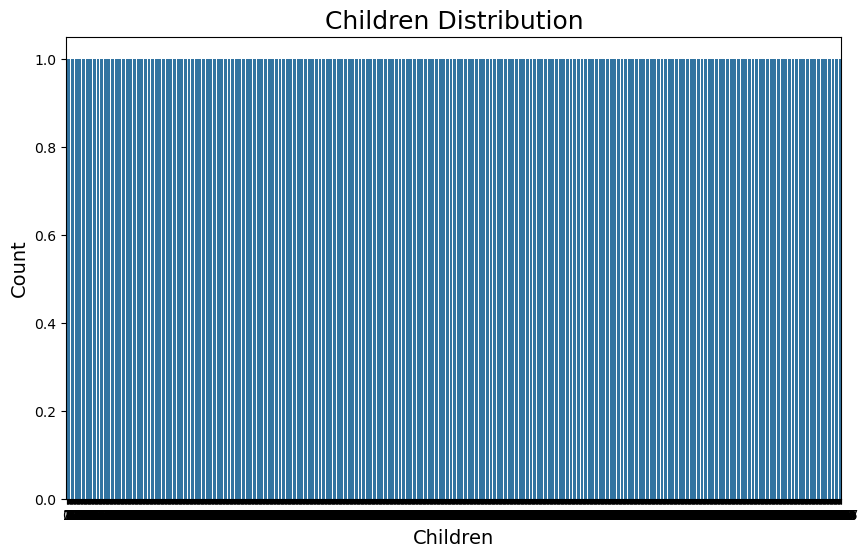

In [53]:
plt.figure(figsize = (10,6))
sns.countplot(df.children)
plt.title('Children Distribution',size=18)
plt.xlabel('Children',size=14)
plt.ylabel('Count',size=14)
plt.show()

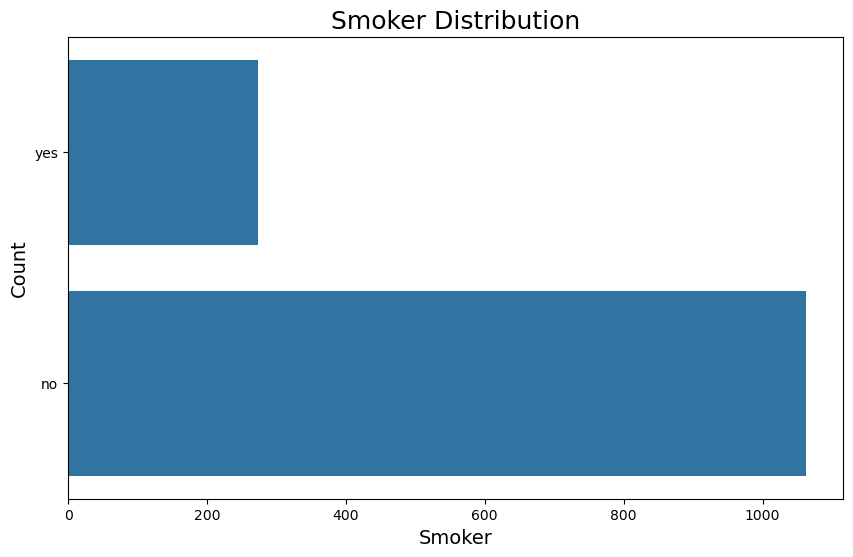

In [55]:
plt.figure(figsize = (10,6))
sns.countplot(df.smoker)
plt.title('Smoker Distribution',size=18)
plt.xlabel('Smoker',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [57]:
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

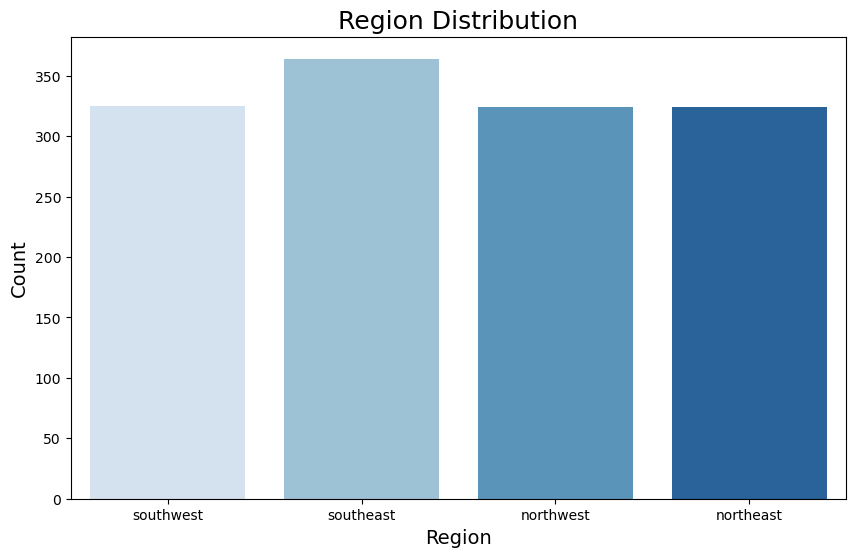

In [61]:
plt.figure(figsize = (10,6))
sns.countplot(x='region', hue='region', data=df, palette='Blues', legend=False)
plt.title('Region Distribution',size=18)
plt.xlabel('Region',size=14)
plt.ylabel('Count',size=14)
plt.show()

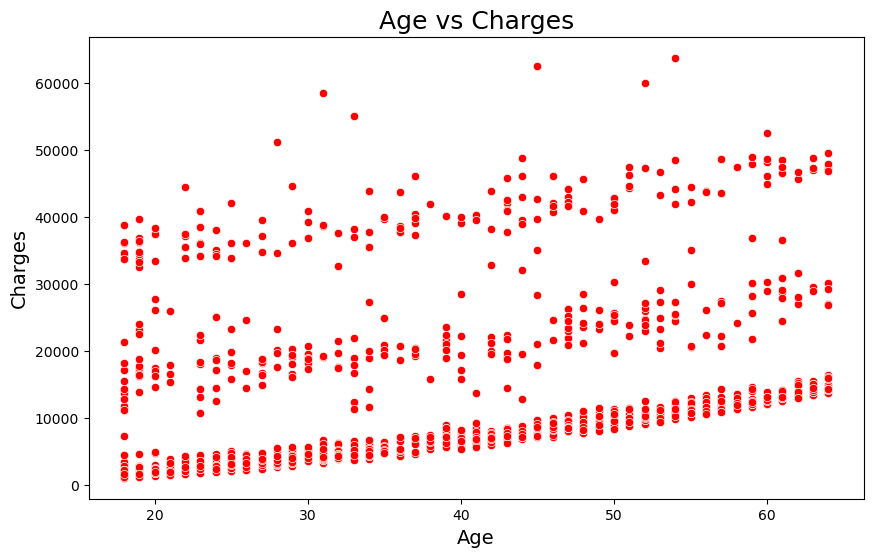

In [63]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='age',y='charges',color='r',data=df)
plt.title('Age vs Charges',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Charges',size=14)
plt.show()

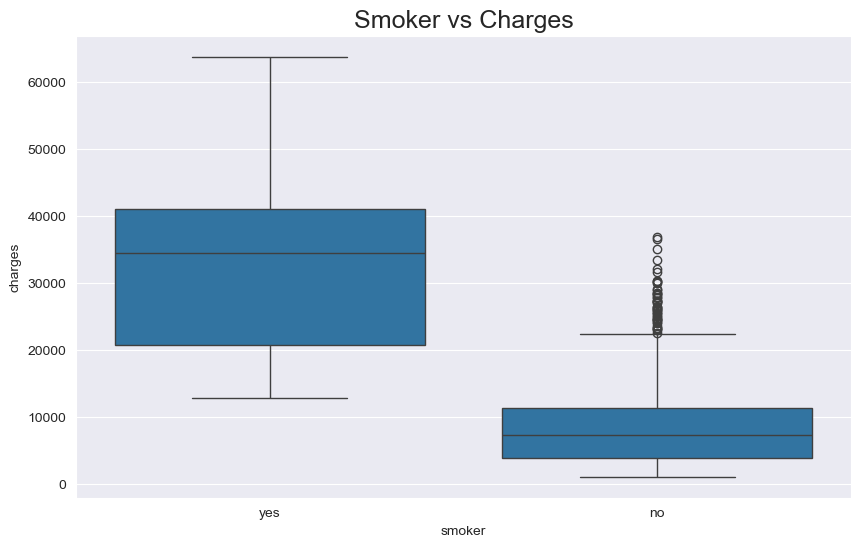

In [84]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(x='smoker',y='charges',data=df)
plt.title('Smoker vs Charges',size=18);

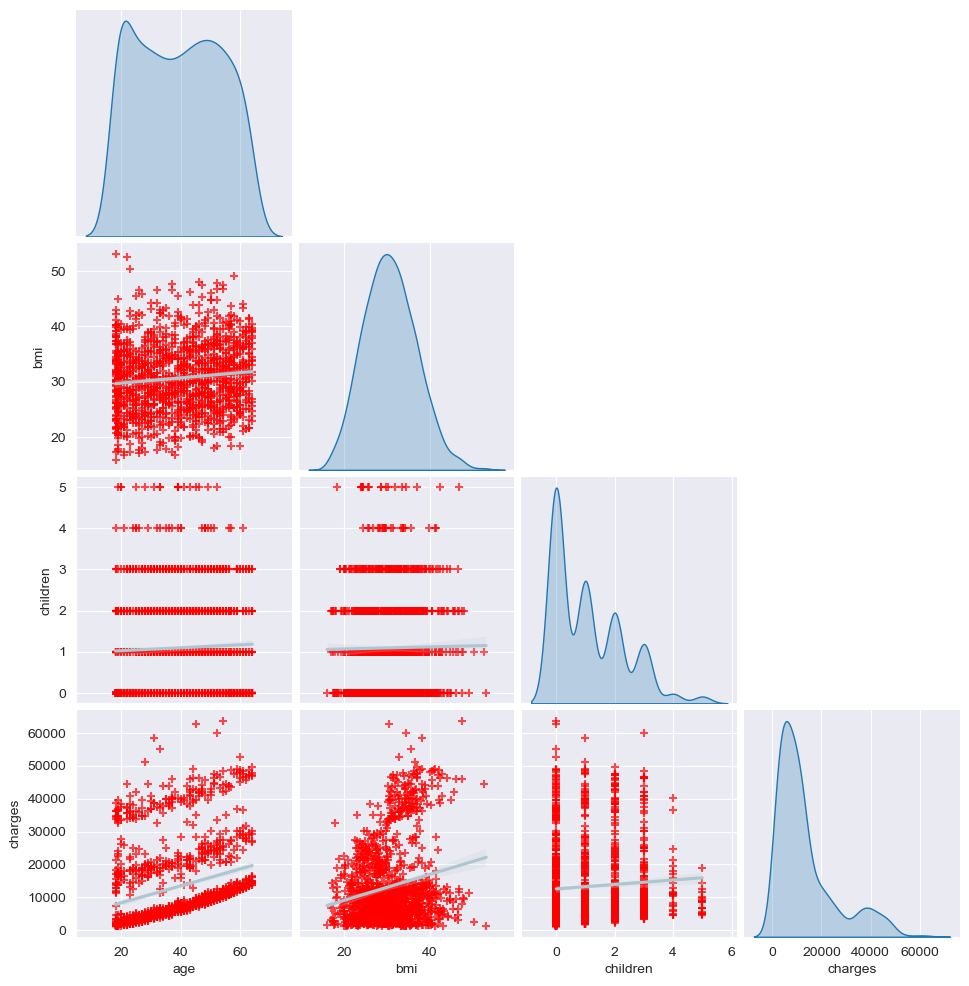

In [86]:
sns.pairplot(df, 
                 markers="+",
                 diag_kind="kde",
                 kind='reg',
                 plot_kws={'line_kws':{'color':'#aec6cf'}, 
                           'scatter_kws': {'alpha': 0.7, 
                                           'color': 'red'}},
                 corner=True);